In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

laptop_specificDf = pd.read_csv("./laptops_train.csv")

laptop_specificDf


,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.42kg,24897600.00
973,Toshiba,Tecra A40-C-1DF,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows,10,1.95kg,10492560.00
974,Asus,Rog Strix,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,10,2.73kg,18227710.80
975,HP,Probook 450,Notebook,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,10,2.04kg,8705268.00


In [2]:
laptop_specificDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Model Name                977 non-null    object 
 2   Category                  977 non-null    object 
 3   Screen Size               977 non-null    object 
 4   Screen                    977 non-null    object 
 5   CPU                       977 non-null    object 
 6   RAM                       977 non-null    object 
 7    Storage                  977 non-null    object 
 8   GPU                       977 non-null    object 
 9   Operating System          977 non-null    object 
 10  Operating System Version  841 non-null    object 
 11  Weight                    977 non-null    object 
 12  Price                     977 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.4+ KB


In [3]:
laptop_specificDf.describe()

,Price
count,9.770000e+02
mean,1.001899e+07
std,6.306430e+06
min,1.706375e+06
25%,5.326308e+06
50%,8.527428e+06
75%,1.311570e+07
max,5.423231e+07


In [4]:
laptop_specificDf.columns = laptop_specificDf.columns.str.lower().str.strip().str.replace(" ", "_")
laptop_specificDf.columns

Index(['manufacturer', 'model_name', 'category', 'screen_size', 'screen',
       'cpu', 'ram', 'storage', 'gpu', 'operating_system',
       'operating_system_version', 'weight', 'price'],
      dtype='object')

In [5]:
laptop_specificDf["operating_system"].value_counts()

operating_system
Windows      837
No OS         52
Linux         48
Chrome OS     22
macOS         13
Mac OS         4
Android        1
Name: count, dtype: int64

In [6]:
laptop_specificDf[laptop_specificDf["operating_system_version"].isna()]["operating_system"].value_counts()

operating_system
No OS        52
Linux        48
Chrome OS    22
macOS        13
Android       1
Name: count, dtype: int64

In [7]:
laptop_specificDf = laptop_specificDf.drop(laptop_specificDf[laptop_specificDf["operating_system"] == "Android"].index)

laptop_specificDf = laptop_specificDf.replace("Mac OS", "macOS")

laptop_specificDf["operating_system"].value_counts()

operating_system
Windows      837
No OS         52
Linux         48
Chrome OS     22
macOS         17
Name: count, dtype: int64

In [8]:
for cols in laptop_specificDf.columns:
    print(laptop_specificDf[cols].value_counts())

manufacturer
Dell         232
Lenovo       225
HP           179
Asus         122
Acer          83
Toshiba       39
MSI           34
Apple         17
Samsung        8
Mediacom       7
Microsoft      6
Razer          5
Xiaomi         4
Chuwi          3
Google         3
LG             3
Huawei         2
Vero           2
Fujitsu        2
Name: count, dtype: int64
model_name
XPS 13                22
Inspiron 3567         20
250 G6                18
Inspiron 5570         18
Vostro 3568           15
                      ..
Leopard GP72M          1
Rog GL753VE-GC070T     1
Rog GL753VD-GC042T     1
Precision 5520         1
ThinkPad T460          1
Name: count, Length: 487, dtype: int64
category
Notebook              549
Ultrabook             152
Gaming                150
2 in 1 Convertible     84
Workstation            24
Netbook                17
Name: count, dtype: int64
screen_size
15.6"    494
14.0"    146
17.3"    131
13.3"    123
11.6"     27
12.5"     23
13.5"      6
13.9"      6
15.4" 

In [9]:
laptop_specificDf[laptop_specificDf["operating_system"] == "macOS"]["operating_system_version"].value_counts()

operating_system_version
X    4
Name: count, dtype: int64

In [10]:
laptop_specificDf[laptop_specificDf["operating_system"] == "macOS"] = laptop_specificDf[laptop_specificDf["operating_system"] == "macOS"].fillna("X")

In [11]:
laptop_specificDf[laptop_specificDf["operating_system_version"].isna()]["operating_system"].value_counts()

operating_system
No OS        52
Linux        48
Chrome OS    22
Name: count, dtype: int64

Manufacturer

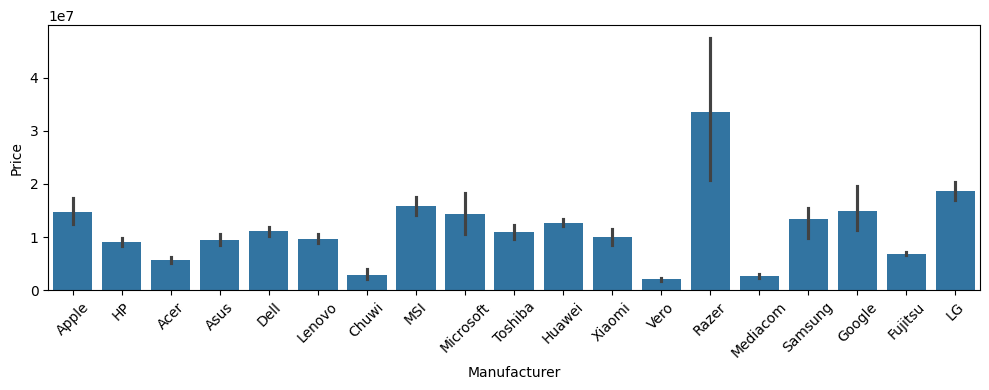

In [12]:
plt.figure(figsize=(10,4))
sns.barplot(data=laptop_specificDf, x="manufacturer", y="price")
plt.xlabel("Manufacturer")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.tight_layout()

In [13]:
from sklearn.preprocessing import LabelEncoder

manufacturer_le = LabelEncoder()
laptop_specificDf["manufacturer"] = manufacturer_le.fit_transform(laptop_specificDf["manufacturer"])
manufacturer_le.classes_

array(['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google',
       'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft',
       'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'], dtype=object)

Model Name

In [14]:
laptop_specificDf["model_brand_name"] = laptop_specificDf["model_name"].apply(lambda x : x.split(" ")[0])
laptop_specificDf["model_type"] = laptop_specificDf["model_name"].apply(lambda x : x.split(" ")[1])

In [15]:
laptop_specificDf = laptop_specificDf.drop(columns="model_name")

In [16]:
print(laptop_specificDf["model_brand_name"].value_counts().to_string())

model_brand_name
Inspiron            104
IdeaPad              72
Aspire               49
ThinkPad             46
Latitude             42
Thinkpad             35
ProBook              34
XPS                  30
Vostro               25
EliteBook            23
Yoga                 19
Legion               19
VivoBook             19
250                  18
Alienware            18
Chromebook           16
Rog                  15
MacBook              15
Probook              15
Tecra                14
ZenBook              14
Satellite            13
Precision            11
Portege              11
Omen                 10
ROG                   9
ZBook                 8
Zenbook               8
Elitebook             7
Notebook              7
Ideapad               7
Envy                  7
Swift                 7
Surface               6
V310-15ISK            6
SmartBook             5
V330-15IKB            5
Spectre               5
Blade                 5
TravelMate            5
Pavilion              5

In [17]:
laptop_specificDf["model_brand_name"] = laptop_specificDf["model_brand_name"].str.lower()
laptop_specificDf["model_type"] = laptop_specificDf["model_type"].str.lower()

In [18]:
laptop_specificDf["model_brand_name"].value_counts()

model_brand_name
inspiron         104
thinkpad          81
ideapad           79
aspire            49
probook           49
                ... 
gt73evr            1
15-bw094nd         1
x505bp-br019t      1
15-bs015dx         1
insprion           1
Name: count, Length: 172, dtype: int64

In [19]:
laptop_specificDf["model_type"].value_counts()

model_type
pro                            32
13                             29
g6                             21
3567                           20
17                             20
                               ..
15,6                            1
(i3-7100u/6gb/256gb/geforce     1
ux390ua                         1
x30-d-10l                       1
a40-c-1df                       1
Name: count, Length: 385, dtype: int64

In [20]:
import numpy as np

def underValues(cols):
    cols_df = laptop_specificDf[cols].value_counts()
    return laptop_specificDf[cols].replace(cols[cols_df < 5].index, np.NaN)
    

In [21]:
laptop_specificDf["model_brand_name"] = underValues("model_brand_name")
print(laptop_specificDf["model_brand_name"].value_counts())

TypeError: string indices must be integers, not 'Series'

In [ ]:
model_brandDf = laptop_specificDf["model_type"].value_counts()
laptop_specificDf["model_type"] = laptop_specificDf["model_type"].replace(model_brandDf[model_brandDf < 5].index, np.NaN)
laptop_specificDf["model_type"].value_counts()

model_type
pro            32
13             29
g6             21
3567           20
17             20
3              19
5570           18
x360           17
y520-15ikbn    15
450            15
3568           15
15             14
5580           12
x1             12
470            11
5              10
flip           10
320-15isk       9
320-15ikbn      9
5567            8
430             8
strix           8
5770            8
850             8
320-15iap       7
yoga            7
7567            7
440             7
7577            6
840             6
5568            6
t470s           6
5480            6
820             6
9               6
3576            6
laptop          6
320-17ikb       6
5379            5
7               5
x270            5
3520            5
320-15ast       5
320-15ikb       5
7re             5
Name: count, dtype: int64

In [ ]:
model_brand_name_le = LabelEncoder()
laptop_specificDf["model_brand_name"] = model_brand_name_le.fit_transform(laptop_specificDf["model_brand_name"])
model_brand_name_le.classes_

array(['250', 'alienware', 'aspire', 'blade', 'chromebook', 'elitebook',
       'envy', 'ideapad', 'inspiron', 'latitude', 'legion', 'macbook',
       'notebook', 'omen', 'pavilion', 'portege', 'precision', 'probook',
       'rog', 'satellite', 'smartbook', 'spectre', 'surface', 'swift',
       'tecra', 'thinkpad', 'travelmate', 'v310-15isk', 'v330-15ikb',
       'vivobook', 'vostro', 'xps', 'yoga', 'zbook', 'zenbook', nan],
      dtype=object)

In [ ]:
model_type_le = LabelEncoder()
laptop_specificDf["model_type"] = model_type_le.fit_transform(laptop_specificDf["model_type"])
model_type_le.classes_

array(['13', '15', '17', '3', '320-15ast', '320-15iap', '320-15ikb',
       '320-15ikbn', '320-15isk', '320-17ikb', '3520', '3567', '3568',
       '3576', '430', '440', '450', '470', '5', '5379', '5480', '5567',
       '5568', '5570', '5580', '5770', '7', '7567', '7577', '7re', '820',
       '840', '850', '9', 'flip', 'g6', 'laptop', 'pro', 'strix', 't470s',
       'x1', 'x270', 'x360', 'y520-15ikbn', 'yoga', nan], dtype=object)

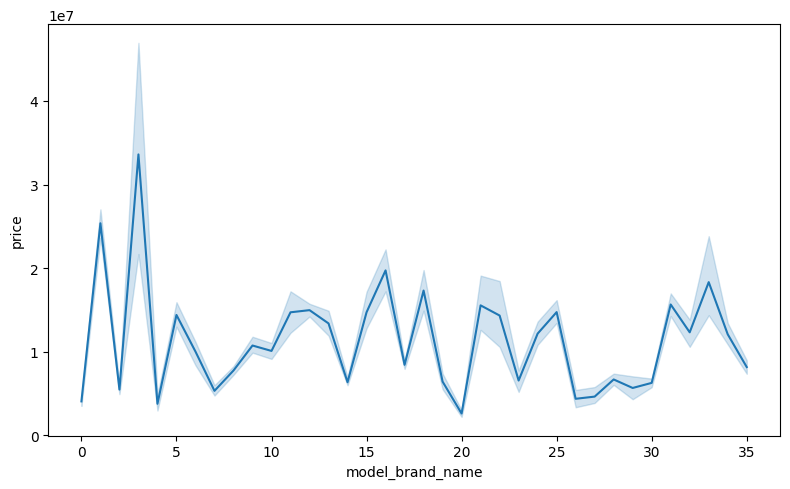

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(data=laptop_specificDf, x="model_brand_name", y="price")
plt.tight_layout()
plt.show()

Category

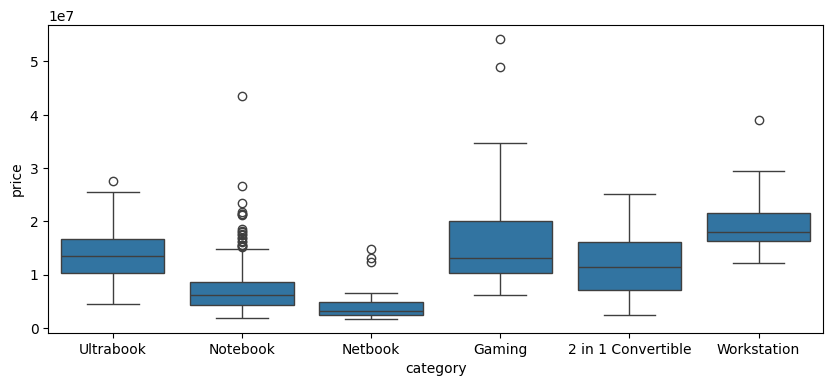

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data=laptop_specificDf, x="category", y="price");

In [ ]:
laptop_specificDf = laptop_specificDf.drop(laptop_specificDf[laptop_specificDf["price"] >= 3.5*10**7].index)

In [ ]:
category_le = LabelEncoder()
laptop_specificDf["category"] = category_le.fit_transform(laptop_specificDf["category"])

Screen Size

In [ ]:
laptop_specificDf["screen_size"] = laptop_specificDf["screen_size"].str.extract(r"(\d+\.+\d)").astype("float")
laptop_specificDf.head()

,manufacturer,category,screen_size,screen,cpu,ram,storage,gpu,operating_system,operating_system_version,weight,price,model_brand_name,model_type
0,1,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,X,1.37kg,11912523.48,11,37
1,1,4,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,X,1.34kg,7993374.48,11,45
2,7,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00,0,35
3,1,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,X,1.83kg,22563005.40,11,37
4,1,4,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,X,1.37kg,16037611.20,11,37


Screen

In [ ]:
laptop_specificDf["width_screen"] = laptop_specificDf["screen"].str.extract(r"(\d+)").astype("int")
laptop_specificDf["height_screen"] = laptop_specificDf["screen"].str.extract(r"(x.\d+)").map(lambda x : x[1:]).astype("int")
laptop_specificDf["screen"] = laptop_specificDf["screen"].str.extract(r"(\D+)").replace("x", np.NaN)
screen_df = laptop_specificDf["screen"].value_counts()
laptop_specificDf["screen"] = laptop_specificDf["screen"].replace(screen_df[screen_df < 5].index, np.NaN)


In [ ]:
laptop_specificDf.iloc[[11,13,16]]

,manufacturer,category,screen_size,screen,cpu,ram,storage,gpu,operating_system,operating_system_version,weight,price,model_brand_name,model_type,width_screen,height_screen
11,7,3,15.6,Full HD,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,NaN,1.86kg,3067651.08,0,35,1920,1080
13,4,3,15.6,Full HD,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows,10,2.2kg,4436218.80,8,11,1920,1080
16,4,3,15.6,Full HD,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R5 M430,Windows,10,2.2kg,6624540.00,8,11,1920,1080


In [ ]:
screen_le = LabelEncoder()
laptop_specificDf["screen"] = screen_le.fit_transform(laptop_specificDf["screen"])


In [ ]:
screen_le.classes_


array(['Full HD ', 'Full HD / Touchscreen ', 'IPS Panel ',
       'IPS Panel Full HD ', 'IPS Panel Full HD / Touchscreen ',
       'IPS Panel Quad HD+ ', 'IPS Panel Retina Display ', 'K Ultra HD ',
       'K Ultra HD / Touchscreen ', 'Quad HD+ / Touchscreen ',
       'Touchscreen ', nan], dtype=object)

In [ ]:
print(laptop_specificDf["cpu"].value_counts().to_string())

cpu
Intel Core i5 7200U 2.5GHz               151
Intel Core i7 7700HQ 2.8GHz              123
Intel Core i7 7500U 2.7GHz               103
Intel Core i5 8250U 1.6GHz                71
Intel Core i7 8550U 1.8GHz                71
Intel Core i3 6006U 2GHz                  57
Intel Core i5 6200U 2.3GHz                32
Intel Core i5 7300HQ 2.5GHz               30
Intel Celeron Dual Core N3350 1.1GHz      27
Intel Core i3 7100U 2.4GHz                26
Intel Celeron Dual Core N3060 1.6GHz      20
Intel Core i7 6500U 2.5GHz                16
Intel Core i5 7300U 2.6GHz                14
Intel Core i7 7600U 2.8GHz                13
Intel Pentium Quad Core N4200 1.1GHz      13
Intel Core i7 6700HQ 2.6GHz               11
AMD A9-Series 9420 3GHz                   10
Intel Core i3 6006U 2.0GHz                10
Intel Pentium Quad Core N3710 1.6GHz       8
Intel Core i3 7130U 2.7GHz                 8
Intel Core i7 6600U 2.6GHz                 8
Intel Core i7 6820HK 2.7GHz                6
Intel 

CPU

In [ ]:
laptop_specificDf["cpu_brand"] = laptop_specificDf["cpu"].map(lambda x : x.split()[0])
laptop_specificDf["cpu_series"] = laptop_specificDf["cpu"].map(lambda x : " ".join(x.split()[1:-2]))

In [ ]:
laptop_specificDf["cpu_series"].value_counts()
laptop_specificDf["screen"] = laptop_specificDf["screen"].replace(screen_df[screen_df < 5].index, np.NaN)

cpu_series
Core i7              380
Core i5              319
Core i3              105
Celeron Dual Core     55
Pentium Quad Core     21
Core                  16
A9-Series             13
Core M                 9
A6-Series              8
Celeron Quad Core      8
Atom                   7
E-Series               7
A10-Series             6
A12-Series             5
Ryzen                  4
A8-Series              2
Xeon E3-1505M          2
FX                     2
Pentium Dual Core      2
A4-Series              1
Name: count, dtype: int64